# 다중 회귀 - 보스턴 주택 가격

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()

In [27]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- #### 산점도와 선형회귀선 그리기: seaborn.regplot()

In [28]:
features = df.columns[1:-1]
features

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

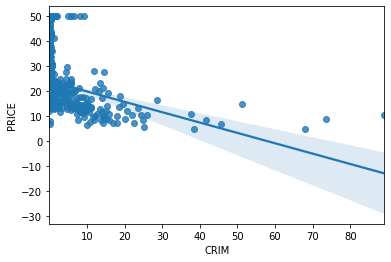

In [29]:
sns.regplot(x='CRIM',y='PRICE',data=df)
plt.show()

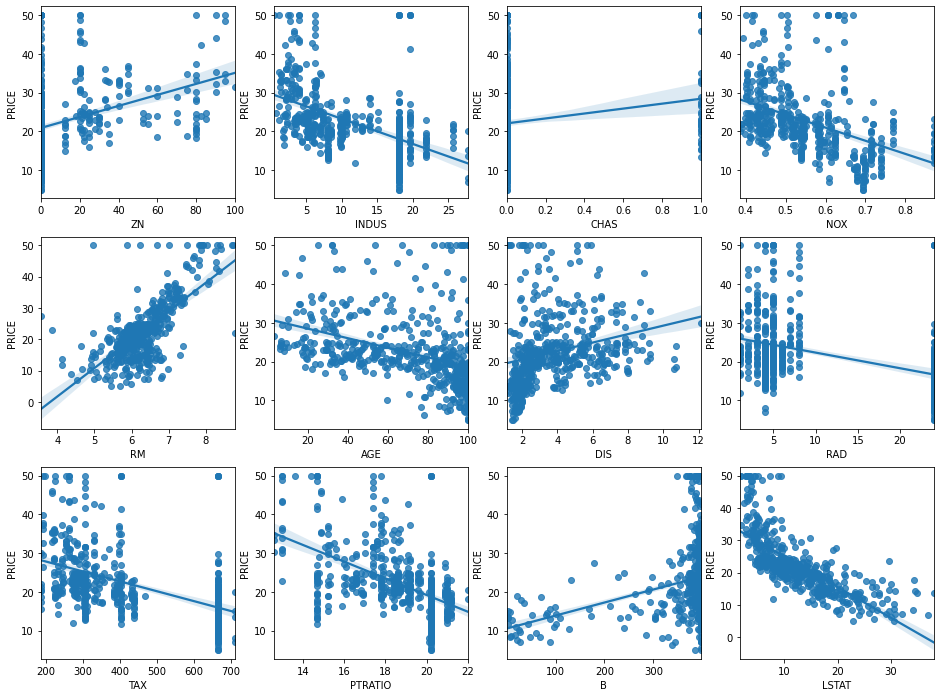

In [54]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(features):
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])




- #### 어떤feature가 가격과 상관관계가 높을까?? 알아보자

In [31]:
y = boston.target
X = boston.data[:,0].reshape(-1,1)      # reshape를 안하려면 [:,0:1]
                                        #이렇게 하면 됨

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.15078046904975717

In [33]:
X=df['CRIM'].values.reshape(-1,1)

In [34]:
y = boston.target
for feature in boston.feature_names:
    X= df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    r2 = lr.score(X,y)
    print(f'{feature}:\t{r2:.4f}')


CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


- #### 다중 선형회귀

In [35]:
X = boston.data
y = boston.target
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [36]:
# 다중 선형회귀에서는 score가 큰 의미가 없음
lr.score(X,y)

0.7406426641094095

In [37]:
# Weight
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [38]:
# bias
lr.intercept_

36.459488385089855

In [39]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

- #### 회귀식


#####  PRICE = -0.108 * CRIM + 0.046 * ZN +0.021 * INDUS + 2.69 * CHAS - 0.178 * NOX + 3.81 * RM 
#####        + 0.00069 * AGE -1.48 * DIS + 0.306 * RAD - 0.012 * TAX
#####        - 0.95 * PTRATIO + 0.00931 * B - 0.525 * LSTAT + 36.46

- #### 테스트 데이터

In [40]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [41]:
# 기울기와 절편을 이용한 예측값
np.dot(lr.coef_, boston.data[0]) + lr.intercept_

30.003843377016814

In [42]:
# 실제값
boston.target[0]

24.0

- ##### 5개 데이터에 대한 예측값 및 실제값

In [43]:
for i in range(5):
    pred = np.dot(lr.coef_, boston.data[i]) + lr.intercept_
    print(f'예측값 : {pred:.2f}, 실제값 : {boston.target[i]}')  

예측값 : 30.00, 실제값 : 24.0
예측값 : 25.03, 실제값 : 21.6
예측값 : 30.57, 실제값 : 34.7
예측값 : 28.61, 실제값 : 33.4
예측값 : 27.94, 실제값 : 36.2


In [44]:
# 데이터가 여러개일 때
lr.predict(boston.data[:5])             #위의 예측값과 같음
                                        #predcit 안에는 np.dot(lr.coef_, boston.data[i]) + lr.intercept_ 를 내장하고 있는것과 마찬가지

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [45]:
# 인덱스 한개일 때 
# 방법 1
lr.predict(boston.data[0].reshape(1,-1))      

array([30.00384338])

In [46]:
# 방법 2
lr.predict(boston.data[0:1])

array([30.00384338])

In [47]:
# 방법 3
lr.predict(boston.data[[0]]) 

array([30.00384338])